In [1]:
import numpy as np
import pandas as pd

import anndata
import scanpy as sc
from ALLCools.mcds import MCDS
from ALLCools.clustering import *
from wmb import mm10, cemba


In [2]:
var_dim = 'geneslop2k-vm23'
cluster_enriched_feature_col = 'L4'
chrom_to_remove = ['chrX', 'chrY', 'chrM', 'chrL']
excluded_L1_annot = ['MGC', 'ODC', 'ASC', 'OPC', 'CB', 'CBX']
mc_type='CHN'


In [3]:
rs1_region_dict = {
    'CTX': ["RSP-1", "RSP-2", "RSP-3", "RSP-4", "RSP-5", "RSP-6", "PFC-1", "PFC-2", "ACA-1", "ACA-2", "ACA-3", "ORB", "AI", "TEa,ECT,PERI-1", "AUD-1", "AUD-2", "AUD-3", "PTLp", "VIS-1", "VIS-2", "VIS-3", "VIS-4", "MOp-1", "MOp-2", "MOp-3", "MOp-4", "MOs-1", "MOs-2", "MOs-3", "SSp-1", "SSp-2", "SSp-3", "SSp-4", "SSp-5", "SSp-6", "SSs-1", "SSs-2", "SSs-3", "SSs-4", "VISC"], 
    'HIP': ["DG-1", "DG-2", "DG-3", "DG-4", "CA-i", "CA-ii", "CA-iii", "CA-iv"], 
    'OLF': ["AON", "MOB"],
    'RHP': ["RHP-1", "RHP-2", "RHP-3", "RHP-4", "RHP-5"],
    'PIR': ["PIR-1", "PIR-2", "PIR-3", "PIR-4", "PIR-5", "PIR-6", "PIR-7", "PIR-8"], 
    'AMY': ["AMY-1", "AMY-2", "AMY-3"],
    'STR': ["CP-1", "CP-2", "CP-3", "ACB-1", "ACB-2", "ACB-3"], 
    'PAL': ["GP", "PAL-1", "PAL-2", "PAL-3"], 
    'TH': ["TH-5", "TH-7", "TH-2", "TH-4", "TH-6", "TH-1", "TH-3"],
    'HY': ["HY-1", "HY-2", "HY-3", "HY-4"],
    'MB': ["VTA-1", "VTA-2", "IC-1", "SC-1", "SC-2", "SC-3", "MRN", "PAG-1", "PAG-2", "PAG-3", "PAG-4"], 
    'HB': ["MY-1", "MY-2", "MY-3", "MY-4", "PCG", "PRN-1", "PRN-2", "PRN-3", "PRN-4"],
}


In [4]:
# Parameters
group_name = "STR"


In [5]:
t = group_name
selected_CEMBARegion = rs1_region_dict[t]
selected_CEMBARegion


['CP-1', 'CP-2', 'CP-3', 'ACB-1', 'ACB-2', 'ACB-3']

In [6]:
meta = cemba.get_mc_mapping_metric()
meta[['L1', 'L1_annot', 'L4', 'L4Region']] = cemba.get_mc_annot()[['L1', 'L1_annot', 'L4', 'L4Region']].to_pandas().loc[meta.index].values
meta

,mCCCFrac,mCGFrac,mCHFrac,FinalmCReads,DissectionRegion,Plate,Col384,Row384,Slice,Sample,...,InputReads,PassBasicQC,PlateNormCov,CEMBARegion,MajorRegion,SubRegion,L1,L1_annot,L4,L4Region
cell,,,,,,,,,,,,,,,,,,,,,
10A_M_1,0.008874,0.819390,0.036336,1073981.0,RSP-4,CEMBA190423_10A_1,0,1,10,10A_190423,...,2252674,True,0.834409,10A,Isocortex,RSP,c18,CT_L6b,c18_c4_c1_c1,c18_c4_c1_c1_r0
10A_M_100,0.007105,0.762382,0.019705,1108484.0,RSP-4,CEMBA190423_10A_2,0,3,10,10A_190423,...,2549478,True,0.842048,10A,Isocortex,RSP,c24,RSP,c24_c0_c0_c0,c24_c0_c0_c0_r2
10A_M_1000,0.006450,0.744689,0.016373,1443814.0,RSP-4,CEMBA190423_10A_4,7,5,10,10A_190423,...,3342484,True,1.031215,10A,Isocortex,RSP,c24,RSP,c24_c0_c0_c0,c24_c0_c0_c0_r2
10A_M_1001,0.007433,0.780743,0.029361,1372174.0,RSP-4,CEMBA190423_10A_3,8,4,10,10A_190423,...,3220214,True,0.942444,10A,Isocortex,RSP,c2,CT_L6b,c2_c3_c4_c2,c2_c3_c4_c2_r0
10A_M_1002,0.006215,0.741165,0.018129,1650777.0,RSP-4,CEMBA190423_10A_3,8,5,10,10A_190423,...,3871980,True,1.133796,10A,Isocortex,RSP,c24,RSP,c24_c0_c0_c0,c24_c0_c0_c0_r2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17A_M_3051,0.007412,0.747842,0.018610,1559491.0,CB-4,CEMBA210812_17A_4,1,14,17,17A_210812,...,4589584,True,1.090938,17A,CB,CBX,c21,CBX,c21_c5_c2_c0,c21_c5_c2_c0_r1
17A_M_3052,0.008806,0.830814,0.043916,1219087.0,CB-4,CEMBA210812_17A_4,0,15,17,17A_210812,...,3510150,True,0.852810,17A,CB,CBX,c36,CBX,c36_c1_c0_c0,c36_c1_c0_c0_r1
17A_M_3053,0.006352,0.768759,0.023178,1723321.0,CB-4,CEMBA210812_17A_4,12,15,17,17A_210812,...,4903466,True,1.205545,17A,CB,CBX,c21,CBX,c21_c5_c0_c0,c21_c5_c0_c0_r1


In [7]:
selc = meta.loc[meta['DissectionRegion'].isin(selected_CEMBARegion) & ~meta['L1_annot'].isin(excluded_L1_annot)].index

In [8]:
len(selc)

12546

In [9]:
mcds = MCDS.open(cemba.CEMBA_SNMC_MCDS_PATH, var_dim=var_dim, use_obs=selc)
mcds

<xarray.MCDS>
Dimensions:                   (cell: 12546, count_type: 2, geneslop2k-vm23: 32208, mc_type: 2)
Coordinates:
  * cell                      (cell) <U15 '3F_M_1318' ... '3F_M_1968'
  * count_type                (count_type) <U3 'mc' 'cov'
  * geneslop2k-vm23           (geneslop2k-vm23) <U18 'ENSMUSG00000051951' ......
    geneslop2k-vm23_chrom     (geneslop2k-vm23) <U5 'chr1' 'chr1' ... 'chrM'
    geneslop2k-vm23_cov_mean  (geneslop2k-vm23) float64 6.313e+03 ... 312.2
    geneslop2k-vm23_end       (geneslop2k-vm23) int64 3673498 3515553 ... 16299
    geneslop2k-vm23_start     (geneslop2k-vm23) int64 3203901 3464587 ... 12145
  * mc_type                   (mc_type) <U3 'CGN' 'CHN'
Data variables:
    geneslop2k-vm23_da        (cell, geneslop2k-vm23, mc_type, count_type) uint16 dask.array<chunksize=(1000, 32208, 1, 1), meta=np.ndarray>
    geneslop2k-vm23_da_frac   (cell, geneslop2k-vm23, mc_type) float32 dask.array<chunksize=(1000, 32208, 1), meta=np.ndarray>
Attributes:
    obs_dim:  cell
    var_dim:  geneslop2k-vm23

In [10]:
adata = mcds.get_adata(mc_type=mc_type,
                       select_hvf=False,
                       split_large_chunks=False)

In [11]:
adata.obs = meta.loc[adata.obs.index].copy()
adata

AnnData object with n_obs × n_vars = 12546 × 32208
    obs: 'mCCCFrac', 'mCGFrac', 'mCHFrac', 'FinalmCReads', 'DissectionRegion', 'Plate', 'Col384', 'Row384', 'Slice', 'Sample', 'Technology', 'InputReads', 'PassBasicQC', 'PlateNormCov', 'CEMBARegion', 'MajorRegion', 'SubRegion', 'L1', 'L1_annot', 'L4', 'L4Region'
    var: 'chrom', 'cov_mean', 'end', 'start'

In [12]:
L4region_to_L2annot = pd.read_csv('/rs2/221112-cemba-tenx-integration/L4Region_L2annot_map_RS1.tsv', sep='\t', header=None, index_col=0).squeeze().to_dict()
adata.obs['L2_annot'] = adata.obs['L4Region'].map(L4region_to_L2annot)


In [13]:
remove_chromosomes(adata, exclude_chromosomes=chrom_to_remove)
remove_black_list_region(adata, black_list_path=mm10.ENCODE_BLACKLIST_PATH)
pass_std_filter = adata.X.std(axis=0) > 0.05
adata._inplace_subset_var(pass_std_filter)


30364 regions remained.
1300 regions removed due to overlapping (bedtools intersect -f 0.2) with black list regions.


Found 529 clusters to compute feature enrichment score
Computing enrichment score
Computing enrichment score FDR-corrected P values
Selected 6520 unique features
41.445024490356445


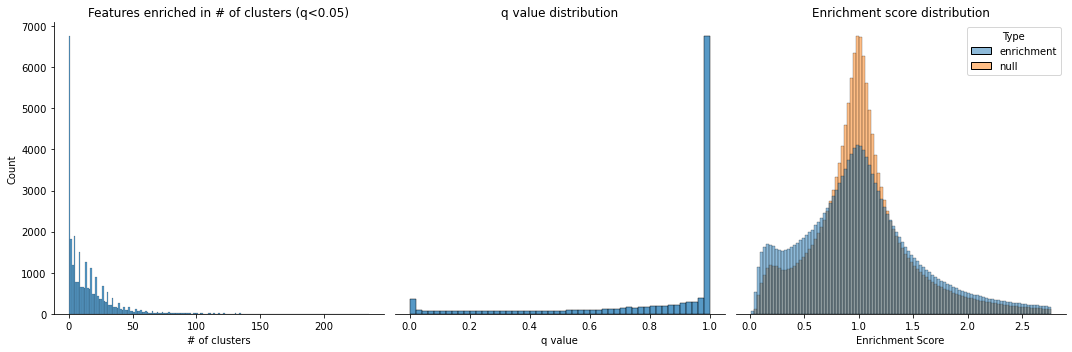

In [ ]:
import time
start_time = time.time()
cluster_enriched_features(adata,
                          cluster_col=cluster_enriched_feature_col,
                          top_n=200,
                          alpha=0.05,
                          stat_plot=True,
                          method='mc')
print(time.time() - start_time)


In [15]:
# log mC fraction and scale features
log_scale(adata, with_mean=True)

# reverse mC fraction so its positively corr with RNA
adata.X = -adata.X


In [16]:
adata._inplace_subset_var(adata.var[f'{cluster_enriched_feature_col}_enriched_features'])
adata.write_h5ad(f'{t}_{adata.shape[0]}_rs1_mch.h5ad')


In [17]:
np.savetxt(f'{t}_mC_CEF.txt', adata.var.index, fmt='%s')
